# 코로나 전후 비교가 중점!
전체 데이터 EDA 를 진행하고, 전체 기간 중 코로나 이전(2019.12-2020.01) 과 코로나 이후(2020.12-2021.01) 를 비교하고자 한다.
1. 데이터 정리
2. 전체 데이터 EDA 진행
3. 코로나 전후 비교 진행(2019.12-2020.01 vs 2020.12-2021.01)
4. 코로나 단기, 장기 비교 진행(2020.02-05 vs 2021.02-05)
5. 이후 방향

In [1]:
# 한글
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# !apt -qq -y install fonts-nanum > /dev/null
 
# import os
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
# fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [5]:
import pandas as pd
import numpy as np


# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일을 이용하겠다.MS
plt.rc('font', family='NanumBarunGothic') 
plt.style.use('seaborn-deep')
sns.set(font_scale=1.3)

In [7]:
# 데이터 불러오기
data = pd.read_csv('data/DATA_SSC_ONEPER_F.csv', encoding='cp949')

In [8]:
data.head(2)

,소비년월,고객거주지역,연령성별,직업,추정소득,일인가구여부,고객수,CNT,CNT_DAY_월,CNT_DAY_화,...,CNT_주차,CNT_차량관리,CNT_차량구매,CNT_취미,CNT_커피음료,CNT_패션잡화,CNT_편의점,CNT_학교,CNT_학원,CNT_화장품
0,201912,경기 파주시,B,D.공무원,D,X,127,1128,200,185,...,0,0,0,0,23,0,101,0,10,0
1,201912,대전 서구,D,E.교육인,A,X,101,1128,193,188,...,0,0,0,15,58,0,72,0,0,10


In [9]:
data.shape

(254394, 75)

In [10]:
data['CNT'].sum()

556605303

In [11]:
data.columns

Index(['소비년월', '고객거주지역', '연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT',
       'CNT_DAY_월', 'CNT_DAY_화', 'CNT_DAY_수', 'CNT_DAY_목', 'CNT_DAY_금',
       'CNT_DAY_토', 'CNT_DAY_일', 'CNT_DAY_평일', 'CNT_DAY_주말공휴일', 'CNT_TIME_A',
       'CNT_TIME_B', 'CNT_TIME_C', 'CNT_TIME_D', 'CNT_TIME_E', 'CNT_TIME_F',
       'CNT_TIME_G', 'CNT_TIME_H', 'CNT_TIME_I', 'CNT_TIME_J', 'CNT_가례',
       'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
       'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
       'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
       'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
       'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
       'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
       'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
       'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품'],
      dtype='object')

## 1. 데이터 정리

1) '소비년월' 열을 year, month 열로 분할

In [12]:
data['소비년월']= data['소비년월'].astype('str')

# 소비년월 -> 년, 월 나눈 새로운 컬럼 생성
data["month"]=data["소비년월"].str[4:6]
data["year"]=data["소비년월"].str[:4]

del data['소비년월']

2) '고객거주지역' 열에서 앞 2글자만 추출

In [13]:
data["고객거주시"]=data["고객거주지역"].str[:2]
del data['고객거주지역']
data.head()

,연령성별,직업,추정소득,일인가구여부,고객수,CNT,CNT_DAY_월,CNT_DAY_화,CNT_DAY_수,CNT_DAY_목,...,CNT_취미,CNT_커피음료,CNT_패션잡화,CNT_편의점,CNT_학교,CNT_학원,CNT_화장품,month,year,고객거주시
0,B,D.공무원,D,X,127,1128,200,185,129,150,...,0,23,0,101,0,10,0,12,2019,경기
1,D,E.교육인,A,X,101,1128,193,188,134,158,...,15,58,0,72,0,0,10,12,2019,대전
2,B,D.공무원,C,X,94,1129,200,210,118,162,...,11,44,0,96,0,0,0,12,2019,경기
3,E,F.자영업자,B,X,165,1129,180,174,153,145,...,10,32,14,52,0,0,11,12,2019,경남
4,A,D.공무원,B,X,90,1131,180,196,162,137,...,17,57,0,163,0,0,0,12,2019,광주


In [14]:
# 코로나 전후 비교를 위해 데이터 완전 copy ~~~ 
detail_data = data.copy()

3) 비슷한 업종끼리 묶기

In [15]:
data[['CNT_가례',
       'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
       'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
       'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
       'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
       'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
       'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
       'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
       'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품']].sum().sort_values(ascending = False)

CNT_온라인쇼핑      99722001
CNT_마트할인점      84523127
CNT_음식점        70798801
CNT_편의점        58390807
CNT_대중교통       46576355
CNT_커피음료       20735844
CNT_주유         20450013
CNT_정기결제       20183775
CNT_배달앱        16862412
CNT_병원         15483606
CNT_건강보조       13544327
CNT_보험         10376875
CNT_제과점        10044128
CNT_교통          6925339
CNT_백화점         5937732
CNT_아울렛         4519688
CNT_취미          4443597
CNT_가전          3105968
CNT_인테리어        3076377
CNT_뷰티          2578620
CNT_주생활관리       2299064
CNT_공과금         2280627
CNT_의류          2248500
CNT_화장품         2230310
CNT_주차          1879677
CNT_서적          1608714
CNT_차량관리        1508614
CNT_골프장         1181655
CNT_숙박          1017668
CNT_문구사무용품       888548
CNT_스포츠의류용품      809879
CNT_학원           802545
CNT_패션잡화         760821
CNT_관람           713560
CNT_유흥           690726
CNT_동물병원         575786
CNT_스포츠시설        405847
CNT_교육기타         327219
CNT_쇼핑기타         268098
CNT_놀이공원         183422
CNT_면세점          159393
CNT_가례          

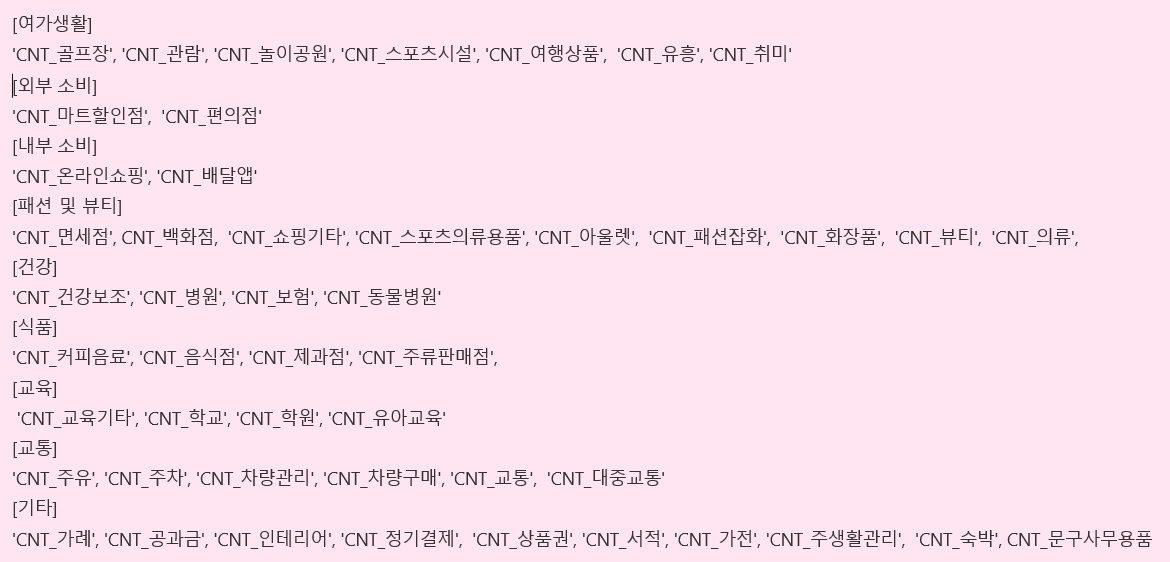

In [16]:
# 총 9개의 범주로 묶음(애매한 건 기타로 넣었는데, 피드백 주세요.)
# 여가생활
data['여가생활'] = data['CNT_골프장'] + data['CNT_관람'] + data['CNT_놀이공원'] + data['CNT_스포츠시설'] + data['CNT_여행상품'] + data['CNT_유흥'] + data['CNT_취미']

# 소비(외부)
data['소비(외부)'] = data['CNT_마트할인점'] + data['CNT_편의점']

# 소비(내부)
data['소비(내부)'] = data['CNT_온라인쇼핑'] + data['CNT_배달앱']

# 패션 및 뷰티
data['패션 및 뷰티'] = data['CNT_면세점'] + data['CNT_백화점'] + data['CNT_쇼핑기타'] + data['CNT_스포츠의류용품'] + data['CNT_아울렛'] + data['CNT_패션잡화'] + data['CNT_화장품'] + data['CNT_뷰티'] + data['CNT_의류']

# 건강
data['건강']= data['CNT_건강보조'] + data['CNT_병원'] + data['CNT_보험']

# 식품
data['식품'] = data['CNT_커피음료'] + data['CNT_음식점'] + data['CNT_제과점'] + data['CNT_주류판매점']

# 교육
data['교육'] = data['CNT_교육기타'] + data['CNT_학교'] + data['CNT_학원'] + data['CNT_유아교육']

# 교통
data['교통'] = data['CNT_주유'] + data['CNT_주차'] + data['CNT_차량관리'] + data['CNT_차량구매'] + data['CNT_교통'] +  data['CNT_대중교통']

# 기타
data['기타'] = data['CNT_가례'] + data['CNT_공과금'] + data['CNT_인테리어'] + data['CNT_정기결제'] + data['CNT_상품권'] + data['CNT_서적'] + data['CNT_가전'] + data['CNT_주생활관리'] + data['CNT_숙박'] + data['CNT_문구사무용품'] + data['CNT_동물병원']

In [17]:
# 기존 업종 열 삭제
data = data.drop(['CNT_가례', 'CNT_가전', 'CNT_건강보조', 'CNT_골프장', 'CNT_공과금', 'CNT_관람', 'CNT_교육기타',
       'CNT_교통', 'CNT_놀이공원', 'CNT_대중교통', 'CNT_동물병원', 'CNT_마트할인점', 'CNT_면세점',
       'CNT_문구사무용품', 'CNT_배달앱', 'CNT_백화점', 'CNT_병원', 'CNT_보험', 'CNT_뷰티',
       'CNT_상품권', 'CNT_서적', 'CNT_쇼핑기타', 'CNT_숙박', 'CNT_스포츠시설', 'CNT_스포츠의류용품',
       'CNT_아울렛', 'CNT_여행상품', 'CNT_온라인쇼핑', 'CNT_유아교육', 'CNT_유흥', 'CNT_음식점',
       'CNT_의류', 'CNT_인테리어', 'CNT_정기결제', 'CNT_제과점', 'CNT_주류판매점', 'CNT_주생활관리',
       'CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_취미', 'CNT_커피음료',
       'CNT_패션잡화', 'CNT_편의점', 'CNT_학교', 'CNT_학원', 'CNT_화장품'], axis=1)

In [18]:
# 확인
data.columns

Index(['연령성별', '직업', '추정소득', '일인가구여부', '고객수', 'CNT', 'CNT_DAY_월', 'CNT_DAY_화',
       'CNT_DAY_수', 'CNT_DAY_목', 'CNT_DAY_금', 'CNT_DAY_토', 'CNT_DAY_일',
       'CNT_DAY_평일', 'CNT_DAY_주말공휴일', 'CNT_TIME_A', 'CNT_TIME_B', 'CNT_TIME_C',
       'CNT_TIME_D', 'CNT_TIME_E', 'CNT_TIME_F', 'CNT_TIME_G', 'CNT_TIME_H',
       'CNT_TIME_I', 'CNT_TIME_J', 'month', 'year', '고객거주시', '여가생활', '소비(외부)',
       '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타'],
      dtype='object')

In [19]:
# 업종 총합계 구하기
# 10건 이하 데이터를 0으로 처리했기 때문에 업종 거래수 합계와 CNT 가 약 100건수 차이가 존재
# -> 이후 업종 별 거래비율을 구하기 위해 '업종 거래수 합계 열'을 추가해준다

data['업종_거래수_총합'] = data['여가생활'] + data['소비(외부)'] + data['소비(내부)']+ data['패션 및 뷰티']+ data['건강']+ data['식품'] + data['교육'] + data['교통'] + data['기타']
data.head(2)

,연령성별,직업,추정소득,일인가구여부,고객수,CNT,CNT_DAY_월,CNT_DAY_화,CNT_DAY_수,CNT_DAY_목,...,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통,기타,업종_거래수_총합
0,B,D.공무원,D,X,127,1128,200,185,129,150,...,0,292,131,0,104,220,10,213,36,1006
1,D,E.교육인,A,X,101,1128,193,188,134,158,...,25,168,265,53,86,213,0,226,18,1054


## 2. 전체 데이터 EDA 진행

### 1) 전체적으로 진행

In [20]:
# [시도할 부분]

# 고객거주지역 별 고객수, 거래건수
# 연령성별 별 고객수, 거래건수 
# 직업 별 거래건수
# 소득 별 거래건수
# 일인가구여부 별 거래건수


# 연령성별 & 업종 별 거래건수
# 직업 & 업종 별 거래건수
# 추정소득 & 업종 별 거래건수
# 일인가구여부 & 업종 별 거래건수

In [21]:
# 고객거주시 별 고객수
고객수 = data[["고객거주시", '고객수']].groupby(['고객거주시']).sum().sort_values(by='고객수', ascending = False).T
고객수

고객거주시,경기,서울,부산,경남,인천,대구,경북,충남,대전,광주,전북,충북,전남,강원,울산,제주,세종
고객수,18915249,13978034,4759243,4059354,3780634,3733151,2923044,2718847,2375079,1881099,1874852,1779361,1533392,1529292,1520971,704755,452031


In [ ]:
# 고객거주시 별 거래수
거래수 = data[["고객거주시", 'CNT']].groupby(['고객거주시']).sum().sort_values(by='CNT', ascending = False).T
거래수

# 결론 : 고객수가 많으니 거래수도 많구나!

In [ ]:
# 인당 거래수 파악하기
인당_거래수 = (거래수.loc['CNT'] / 고객수.loc['고객수']) * 100
인당_거래수.sort_values(ascending=False)

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(18, 8))

# 고객거주시 별 고객수
고객수.T.plot.pie(labels=고객수.T.index, autopct='%.0f%%', ax=ax[0], subplots=True)
ax[0].set_title('고객거주시 별 고객수')
ax[0].set_ylabel('')
ax[0].legend(loc=(0.0, 1.0), ncol=5, fontsize=10)

# 고객거주시 별 거래수
거래수.T.plot.pie(labels=거래수.T.index, autopct='%.0f%%', ax=ax[1], subplots=True)
ax[1].set_title('고객거주시 별 거래수')
ax[1].set_ylabel('')
ax[1].legend(loc=(0.0, 1.0), ncol=5, fontsize=10)

# 고객거주시 별 인당 거래수 -> 막대로 뺄까
인당_거래수.plot.pie(labels=인당_거래수.index, autopct='%.0f%%', ax=ax[2], subplots=True)
ax[2].set_title('고객거주시 별 거래수')
ax[2].set_ylabel('')
ax[2].legend(loc=(0.0, 1.0), ncol=5, fontsize=10)

plt.show()

# 범례랑 title 거리 넓히기
# 한글 폰트 설정

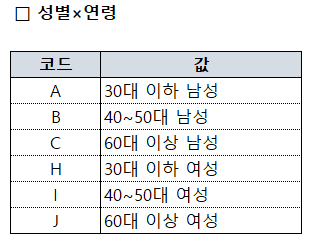

In [ ]:
# 연령성별 별 고객수
고객수 = data[['연령성별', '고객수']].groupby(['연령성별']).sum().sort_values(by='고객수', ascending = False).T
고객수
# ? 데이터정의서와 다름. 오타겠지?
# 40~50대 여성, 남성이 가장 많고, 60대 이상 남성, 여성이 하위

In [59]:
# 연령성별 별 거래건수
거래수 = data[['연령성별', 'CNT']].groupby(['연령성별']).sum().sort_values(by='CNT', ascending = False).T
거래수
# 위 결과와 같이 봤을 때, 4-50대가 신용카드 사용이 많고, 60대 이상은 신용카드 사용이 적다

연령성별,B,E,A,D,C,F
CNT,145604605,143478677,119361392,90271927,30095930,27792772


In [60]:
# 1인당 거래수 파악하기
인당_거래수 = (거래수.loc['CNT'] / 고객수.loc['고객수']) * 100
인당_거래수.sort_values(ascending=False)

# 30대(A,D)가 소비가 가장 많음, 60대가 소비가 가장 적음
# 신기한 것 : 모든 연령대에서 남자가 거래수가 더 많다?

연령성별
A    1383.966948
D    1166.434625
B     774.300487
E     735.895566
C     433.871743
F     401.846894
dtype: float64

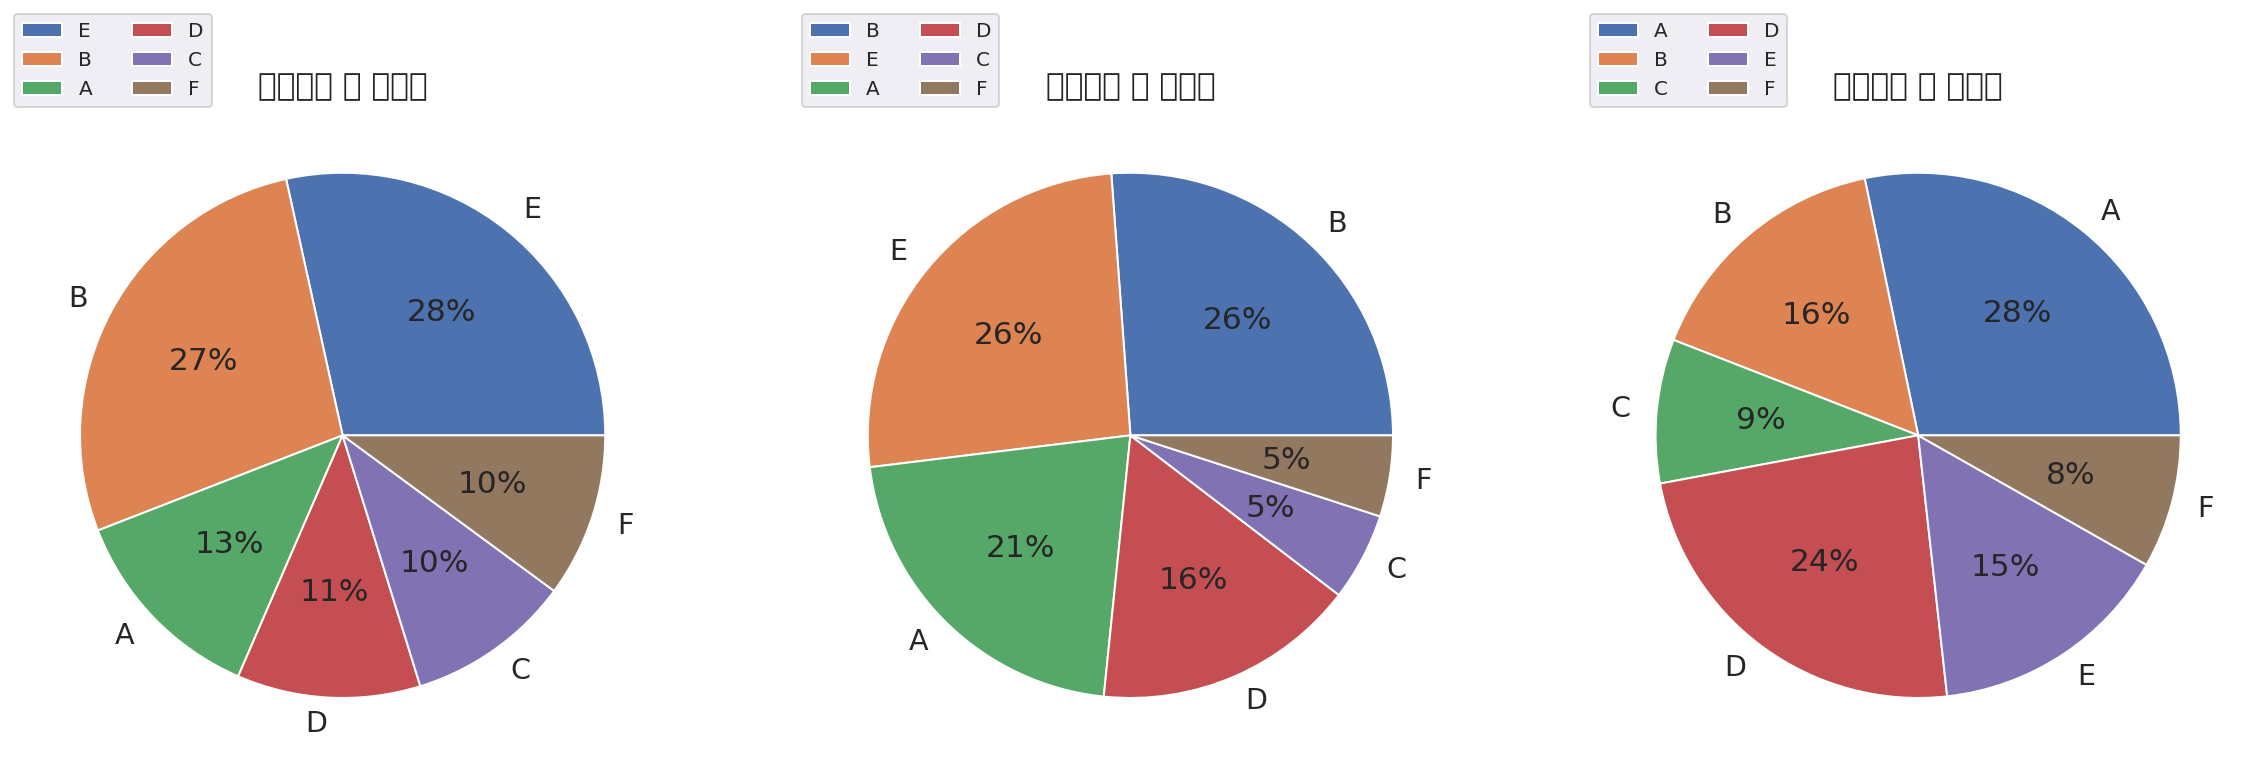

In [61]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# 연령성별 별 고객수
고객수.T.plot.pie(labels=고객수.T.index, autopct='%.0f%%', ax=ax[0], subplots=True)
ax[0].set_title('연령성별 별 고객수')
ax[0].set_ylabel('')
ax[0].legend(loc=(0.0, 1.0), ncol=2, fontsize=10)

# 연령성별 별 거래수
거래수.T.plot.pie(labels=거래수.T.index, autopct='%.0f%%', ax=ax[1], subplots=True)
ax[1].set_title('연령성별 별 거래수')
ax[1].set_ylabel('')
ax[1].legend(loc=(0.0, 1.0), ncol=2, fontsize=10)

# 연령성별 별 인당 거래수 -> 막대로 뺄까
인당_거래수.T.plot.pie(labels=인당_거래수.index, autopct='%.0f%%', ax=ax[2], subplots=True)
ax[2].set_title('연령성별 별 거래수')
ax[2].set_ylabel('')
ax[2].legend(loc=(0.0, 1.0), ncol=2, fontsize=10)

plt.show()

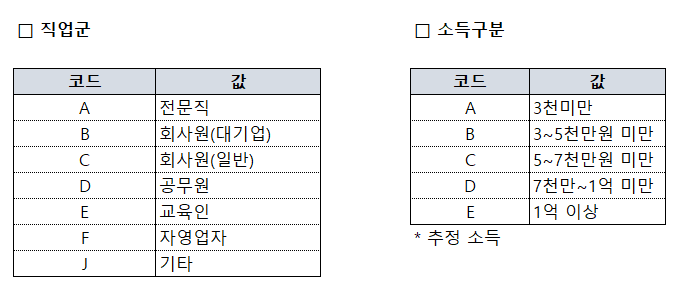

In [62]:
# 직업 별 거래건수
data[['직업', '고객수', 'CNT']].groupby(['직업']).sum().sort_values(by=['고객수','CNT'], ascending=False).T

직업,C.회사원(일반),J.기타,F.자영업자,B.회사원(대기업),D.공무원,E.교육인,A.전문직
고객수,31534271,20713011,7695803,4426441,2398950,1431480,318432
CNT,291131518,122166478,64776416,50282497,14309788,10176503,3762103


In [63]:
추정소득 = data[['추정소득', '고객수', 'CNT']].groupby(['추정소득']).sum().sort_values(by=['고객수','CNT'], ascending=False).T
추정소득
# 위에 소득 별 거래건수 순서랑 동일함
# 데이터가 많은 구간이기 때문에 거래건수가 많은 것 같음(이 순서를 뒤집을 정도로 생각보다 높은소득에서 비싼 소비를 하지는 않나봄)

추정소득,B,A,C,D,E
고객수,38810847,15037678,9485294,3631065,1553504
CNT,314076128,115280803,80785341,30581228,15881803


In [64]:
고객수 = 추정소득.loc['고객수']
거래수 = 추정소득.loc['CNT']

# 인당 거래수 파악하기
인당_거래수 = (거래수 / 고객수) * 100
인당_거래수.sort_values(ascending=False)

# 대게 추정소득이 높을수록 거래건수가 많음

추정소득
E    1022.321346
C     851.690427
D     842.210977
B     809.248322
A     766.613057
dtype: float64

In [65]:
# 추정소득 별 인당 거래수 막대그래프

In [66]:
# 일인가구여부 별 거래건수 -> 2인이상 가구가 약 3배 많음 => 거래건수 비교는 무의미
일인가구 = data[['일인가구여부', '고객수', 'CNT']].groupby('일인가구여부').sum()
일인가구

,고객수,CNT
일인가구여부,,
O,10298681,145884936
X,58219707,410720367


In [67]:
고객수 = 일인가구['고객수']
거래수 = 일인가구['CNT']

# 인당 거래수 파악하기
인당_거래수 = (거래수 / 고객수) * 100
인당_거래수.sort_values(ascending=False)

# 일인가구가 1인당 거래수가 더 많음

일인가구여부
O    1416.540002
X     705.466221
dtype: float64

In [68]:
# 일인가구여부 별 인당 거래수 막대 그래프

### 2) 업종에 집중하여 분석

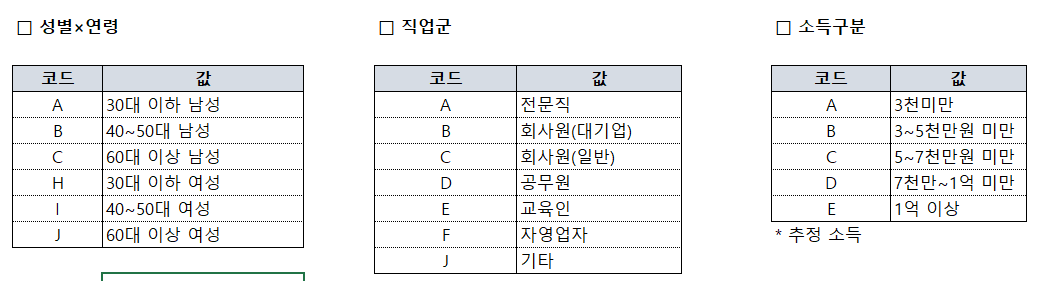

In [69]:
# 업종 : '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타'
# 연령성별 & 업종 별 거래건수
# 직업 & 업종 별 거래건수
# 추정소득 & 업종 별 거래건수
# 일인가구여부 & 업종 별 거래건수

In [70]:
# 어느 업종에 몇 % 소비하는지
# 전체거래수로 나눠서 누적막대그래프(가로)
전체거래수 = data[['연령성별', '업종_거래수_총합']].groupby('연령성별').sum()
업종별거래수 = data[['연령성별', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타',]].groupby('연령성별').sum()

업종비율 = round((업종별거래수.T/전체거래수['업종_거래수_총합'].T * 100),2).T
업종비율

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통,기타
연령성별,,,,,,,,,
A,2.48,27.60,23.27,2.60,3.66,19.97,0.05,15.51,4.85
B,1.55,28.47,15.37,2.57,7.35,20.59,0.28,16.35,7.47
C,0.94,31.75,6.80,1.63,16.17,18.22,0.01,17.62,6.86
D,0.98,19.11,31.54,4.64,4.85,18.84,0.15,14.94,4.94
E,0.92,25.20,24.66,4.88,8.42,16.96,0.41,10.85,7.70
F,0.50,35.20,12.50,5.43,15.68,13.60,0.02,10.35,6.72


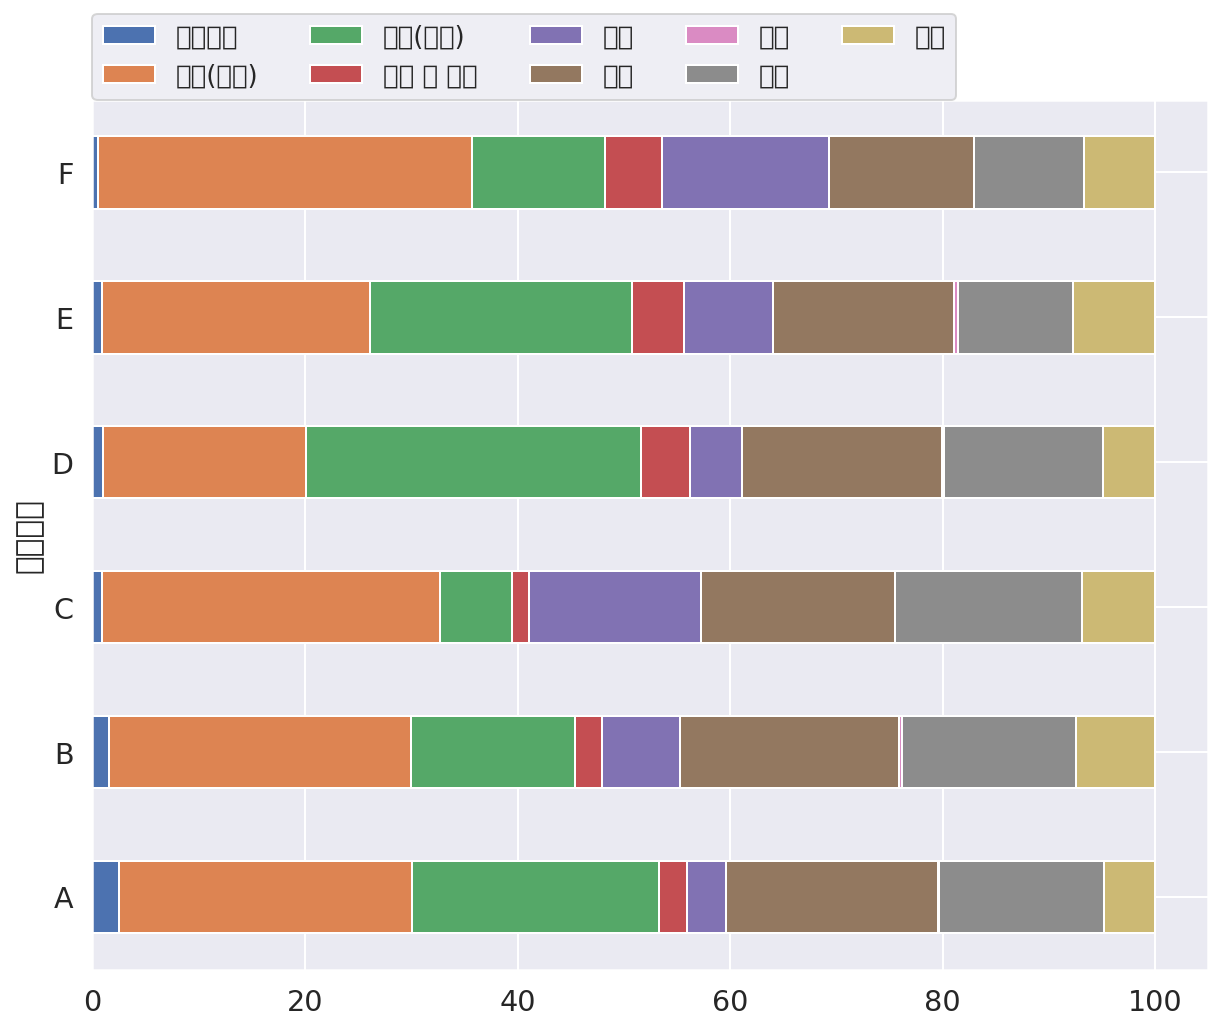

In [71]:
# 누적막대그래프
업종비율.plot(kind='barh', stacked=True, figsize=(10,8))
plt.legend(loc=(0.0, 1.0), ncol=5, fontsize=13)
plt.show()

In [72]:
# 연령성별 & 업종 별 거래건수

data[['연령성별', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].groupby('연령성별').sum().sort_values(by='여가생활', ascending=False)

# 연령성별 범주의 개수가 다 다르기 때문에 범주 별로 비교하기 어려움

# 전체적으로 소비(외부), 소비(내부), 식품에 소비를 많이 함
# 남성(A,B,C)은 확실히 소비(외부) > 소비(내부) , 여성(D,E,F)은 소비(외부) < 소비(내부) 이거나 비슷하거나 등 다양함
# 60대(C,F)는 교육에 소비가 적다 -> 자녀들이 다 컸기 때문?

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통,기타
연령성별,,,,,,,,,
A,2900675,32249453,27190136,3037905,4277283,23331980,63453,18125774,5665408
B,2201220,40346948,21783714,3648024,10411225,29177300,398658,23167888,10585783
E,1284373,35320228,34552871,6841450,11796345,23775053,568329,15209656,10796481
D,867978,16895136,27880390,4105218,4288717,16650273,135505,13208260,4363677
C,263203,8874414,1900369,457022,4519617,5092266,3308,4925988,1918700
F,132307,9227755,3276933,1423422,4111621,3564502,6023,2714544,1761312


In [73]:
# 십만 단위로 정리한 후 누적그래프(가로)

In [74]:
# 직업 & 업종 별 거래건수
data[['직업', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].groupby('직업').sum().sort_values(by='여가생활', ascending=False)

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통,기타
직업,,,,,,,,,
C.회사원(일반),4978334,73898972,62376843,10502425,18566095,54593498,615653,43021795,17942004
J.기타,1213628,34011147,24149612,5058044,12080024,19847350,332739,13422778,8403265
F.자영업자,654169,17825012,12262072,1600135,4488148,11335660,99747,8852813,4889099
B.회사원(대기업),625335,10733762,11669820,1642695,2446054,10337477,81762,8546164,2417780
D.공무원,80622,3539545,2738523,238030,1046724,2726126,16934,1853771,735890
A.전문직,51572,709985,810229,188584,142824,887633,14141,506927,228871
E.교육인,46096,2195511,2577314,283128,634939,1863630,14300,1147862,474452


In [75]:
# 십만 단위로 정리한 후 누적그래프(가로)

In [76]:
# 추정소득 & 업종 별 거래건수
data[['추정소득', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].groupby('추정소득').sum().sort_values(by='여가생활', ascending=False)

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통,기타
추정소득,,,,,,,,,
B,4111031,82606334,66489898,11333898,22705731,56050408,740687,42931755,20884279
A,1974629,31378194,24516193,3781458,8688653,19460607,75723,15396310,6097732
C,911261,18960721,16670539,2738994,5250358,15831497,220319,11922030,5283553
D,384320,6795110,5897320,992871,1888463,6484896,80945,4668714,1871482
E,268515,3173575,3010463,665820,871603,3763966,57602,2433301,954315


In [77]:
# 십만 단위로 정리한 후 누적그래프(가로)

In [78]:
# 일인가구여부 & 업종 별 거래건수
data[['일인가구여부', '여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].groupby('일인가구여부').sum().sort_values(by='여가생활', ascending=False)

,여가생활,소비(외부),소비(내부),패션 및 뷰티,건강,식품,교육,교통,기타
일인가구여부,,,,,,,,,
X,4954184,103295469,83580850,15416669,30925213,75511277,1072727,57450453,27160875
O,2695572,39618465,33003563,4096372,8479595,26080097,102549,19901657,7930486


In [79]:
# 십만 단위로 정리한 후 누적그래프(가로)

## 3. 코로나 전후 비교 진행

In [80]:
# 코로나 전후 데이터 나누기

# 코로나 전 데이터(201912-202001)
data1 = data[(data['year'] == '2019') & (data['month'] == '12')]
data2 = data[(data['year'] == '2020') & (data['month'] == '01')]

# 코로나 후 데이터(202012-202101)
data3 = data[(data['year'] == '2020') & (data['month'] == '12')]
data4 = data[(data['year'] == '2021') & (data['month'] == '01')]

# 코로나 전후 각각 데이터 합치기
no_covid = pd.concat([data1, data2])
covid = pd.concat([data3, data4])

In [81]:
print(len(no_covid))
print(len(covid))

41067
42668


#### 1) 코로나 전후 전체 거래수 비교

In [82]:
# 코로나 전후 거래 전체 건수 비교(CNT) -> 코로나 후 전체거래 수 감소
print(no_covid['CNT'].sum())
print(covid['CNT'].sum())

# 감소율 파악
print(round((no_covid['CNT'].sum() - covid['CNT'].sum()) / no_covid['CNT'].sum() * 100, 2))

104695893
88249097
15.71


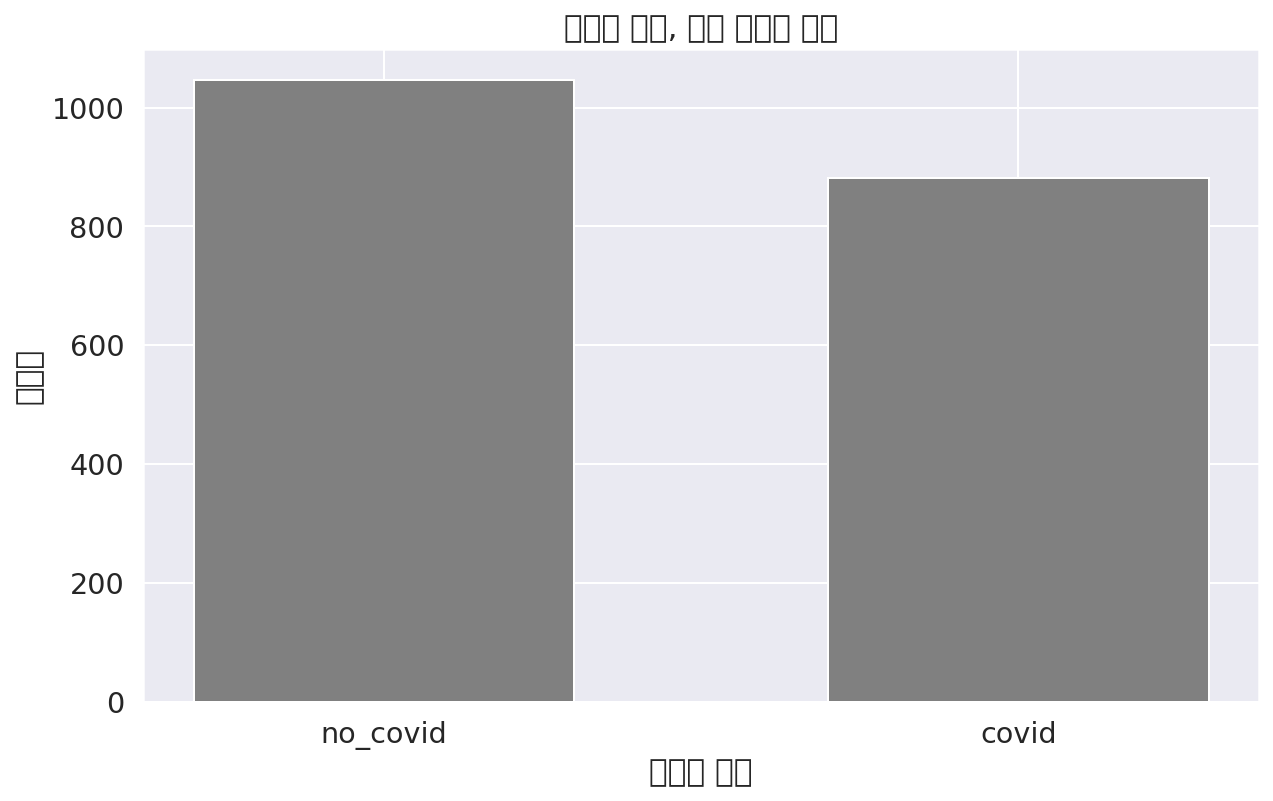

In [83]:
xs=['no_covid', 'covid']
ys=[int(no_covid['CNT'].sum() / 100000) , int(covid['CNT'].sum() / 100000)]


plt.figure(figsize=(10, 6)) 

plt.xlabel('코로나 여부') 
plt.ylabel('거래수') 


plt.bar(xs, ys, width=0.6, color='grey')
plt.title('코로나 전후, 전체 거래수 비교')
plt.show()

# 한글설정, y축 범위 지정(단위가 너무 커서 y축에 0~1로 표현 됨 -> 십만 단위추가). 

#### 2) 코로나 전후 업종 별 거래수 비교

In [84]:
업종1 = no_covid[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].sum()
업종2 = covid[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].sum()

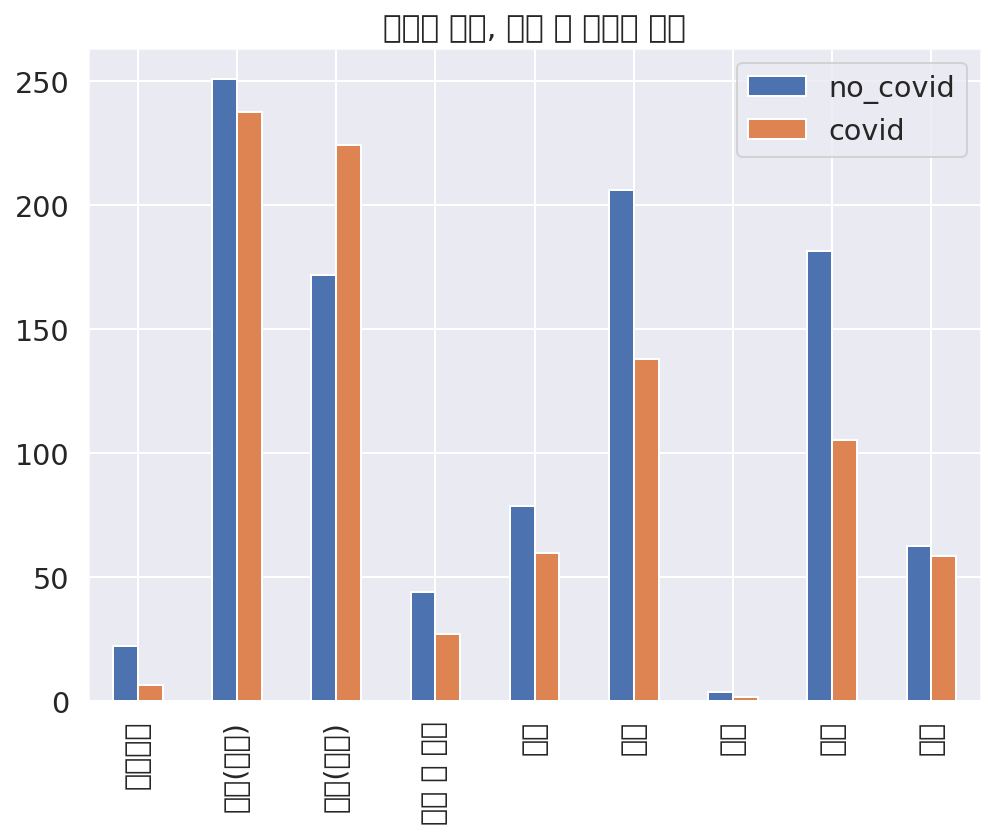

In [85]:
# 시각화
업종_시각화 = pd.concat([업종1, 업종2], axis=1)
업종_시각화.columns = ['no_covid', 'covid']
업종_시각화 = 업종_시각화 / 100000

업종_시각화.plot(kind='bar', figsize=(8, 6))
plt.title('코로나 전후, 업종 별 거래수 비교')
plt.show()
# 한글설정, 단위(십만)추가하기

In [86]:
# 업종 별 감소율
업종감소율 = (업종1 - 업종2) / 업종1 * 100
업종감소율 = 업종감소율.sort_values(ascending=False)

# 여가생활 큰 폭으로 감소, 교육, 교통, 패션뷰티 -> 더 자세하게 확인
# 유일하게 증가한 소비(내부) 자세하게 확인

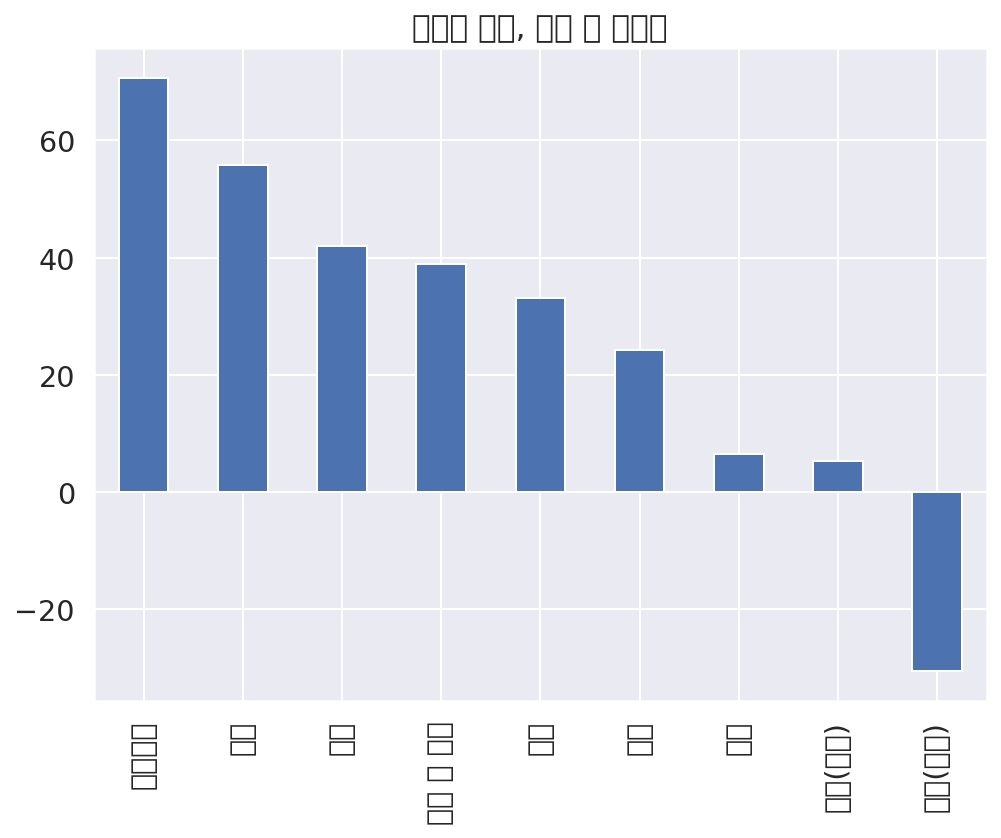

In [87]:
업종감소율.plot(kind='bar', figsize=(8,6))
plt.title('코로나 전후, 업종 별 감소율')
plt.show()

#### 3) 큰 폭으로 감소, 증가한 업종 자세히 살펴보기

In [88]:
# 위에서 업종 열을 삭제했기 때문에 필요한 업종 데이터만 살리기

# 코로나 전 데이터(201912-202001)
data1 = detail_data[(detail_data['year'] == '2019') & (detail_data['month'] == '12')]
data2 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '01')]

# 코로나 후 데이터(202012-202101)
data3 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '12')]
data4 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '01')]

# 코로나 전후 각각 데이터 합치기
detail_no_covid = pd.concat([data1, data2])
detail_covid = pd.concat([data3, data4])

In [89]:
print(len(detail_no_covid))
print(len(detail_covid))

41067
42668


In [90]:
# 여가생활 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = detail_no_covid[['CNT_골프장', 'CNT_관람', 'CNT_놀이공원', 'CNT_스포츠시설', 'CNT_여행상품', 'CNT_유흥','CNT_취미']].sum()
업종2 = detail_covid[['CNT_골프장', 'CNT_관람', 'CNT_놀이공원', 'CNT_스포츠시설', 'CNT_여행상품', 'CNT_유흥','CNT_취미']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 관람, 유흥, 놀이공원, 스포츠시설 크게 감소

CNT_관람       95.629199
CNT_유흥       94.985285
CNT_놀이공원     92.971335
CNT_스포츠시설    85.374579
CNT_취미       58.982528
CNT_여행상품     54.864702
CNT_골프장      11.112029
dtype: float64

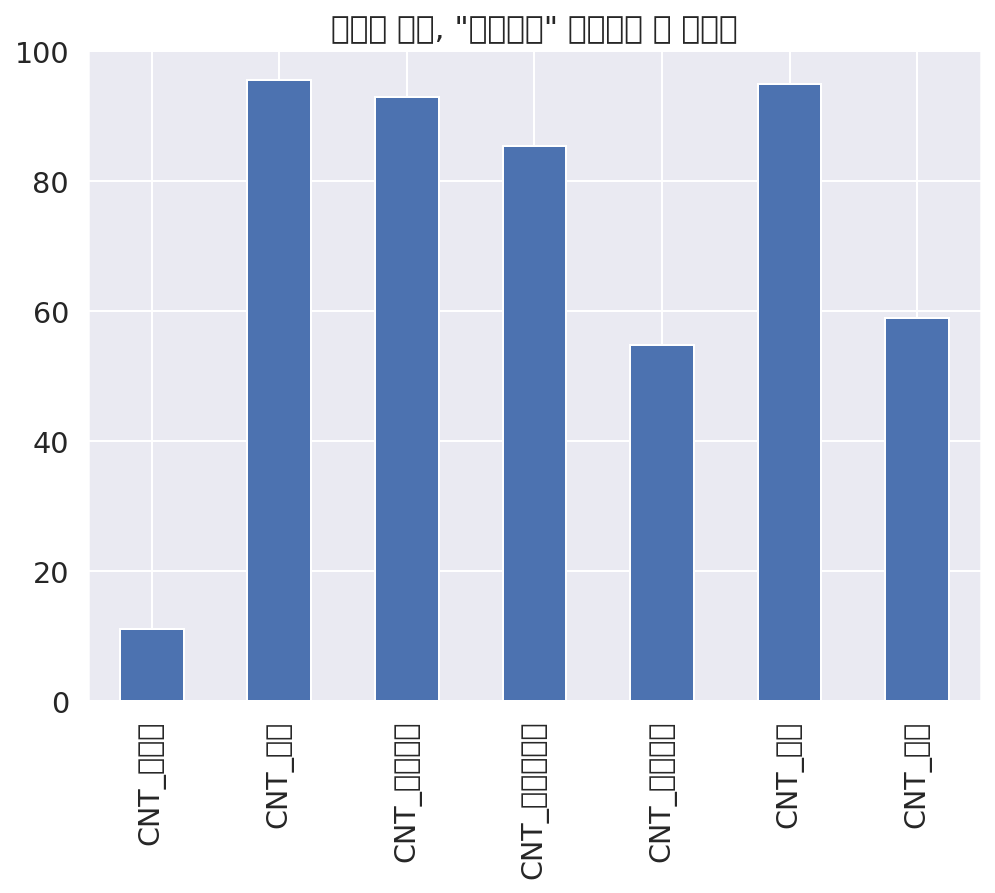

In [91]:
업종감소율.plot(kind='bar', figsize=(8,6))
plt.title('코로나 전후, "여가생활" 세부업종 별 감소율')
plt.show()

In [92]:
# 교육 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = detail_no_covid[['CNT_교육기타', 'CNT_학교', 'CNT_학원', 'CNT_유아교육']].sum()
업종2 = detail_covid[['CNT_교육기타', 'CNT_학교', 'CNT_학원', 'CNT_유아교육']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 유아교육(유치원 때문에?), 학교???

CNT_유아교육    99.763890
CNT_학교      78.627874
CNT_교육기타    51.382641
CNT_학원      50.710667
dtype: float64

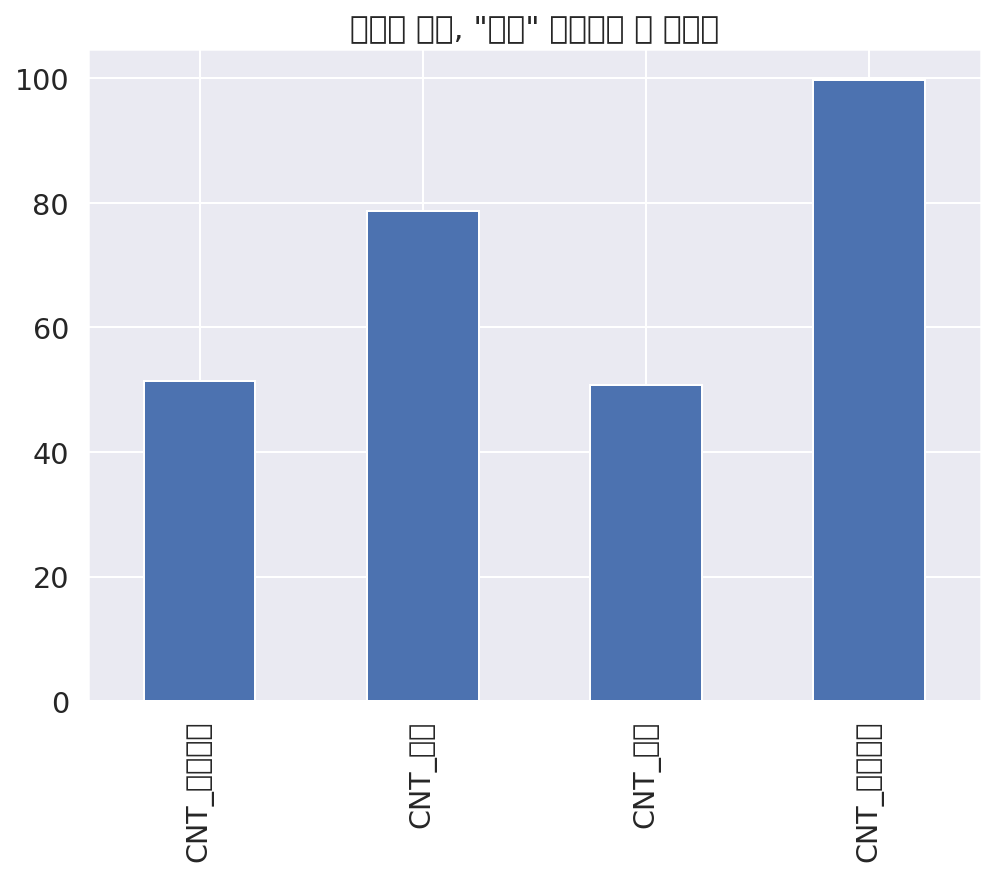

In [93]:
업종감소율.plot(kind='bar', figsize=(8,6))
plt.title('코로나 전후, "교육" 세부업종 별 감소율')
plt.show()

In [94]:
# 교통 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = detail_no_covid[['CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_교통',  'CNT_대중교통']].sum()
업종2 = detail_covid[['CNT_주유', 'CNT_주차', 'CNT_차량관리', 'CNT_차량구매', 'CNT_교통',  'CNT_대중교통']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 교통, 대중교통 등 감소 -> 코로나 때문에 외출이 줄어서
# 차량관리, 차량구매가 늘었음 -> 대중교통 대신 자가용 사용, 차박

CNT_교통      57.160599
CNT_대중교통    50.872349
CNT_주차      31.675502
CNT_주유      10.706224
CNT_차량관리    -5.057823
CNT_차량구매   -66.446826
dtype: float64

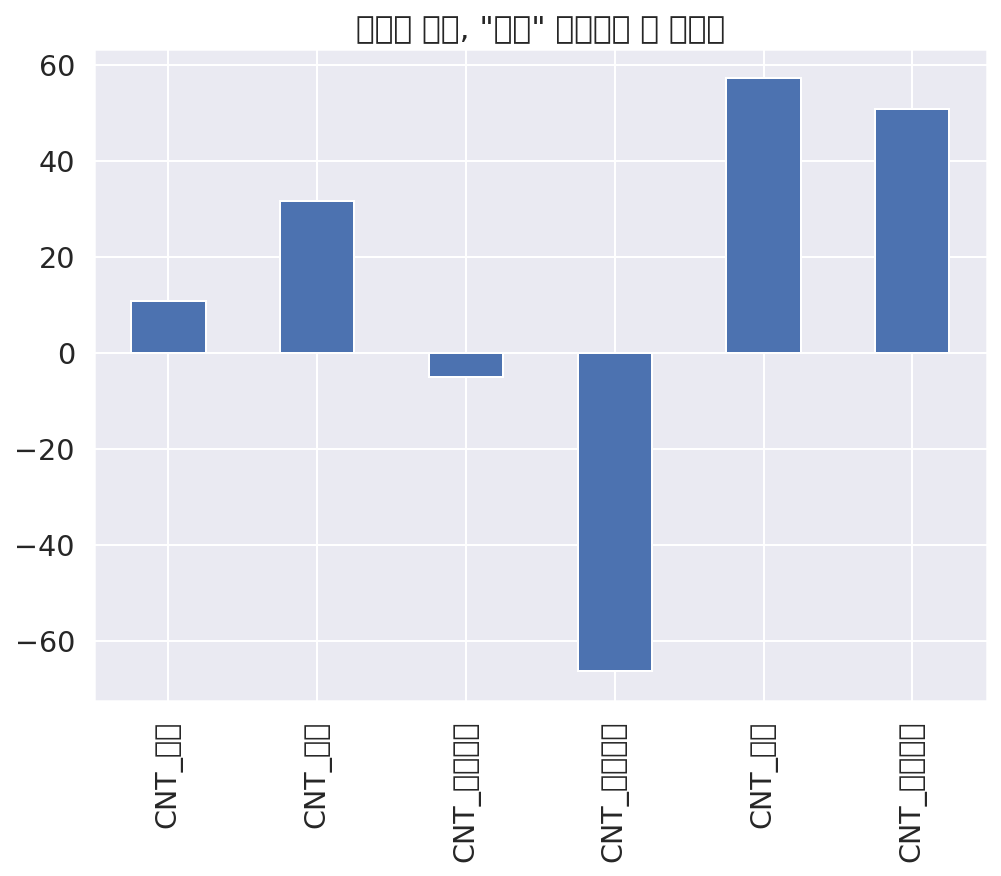

In [95]:
업종감소율.plot(kind='bar', figsize=(8,6))
plt.title('코로나 전후, "교통" 세부업종 별 감소율')
plt.show()

In [96]:
# 패션 및 뷰티 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = detail_no_covid[['CNT_면세점', 'CNT_백화점', 'CNT_쇼핑기타', 'CNT_스포츠의류용품', 'CNT_아울렛',  'CNT_패션잡화',  'CNT_화장품',  'CNT_뷰티',  'CNT_의류']].sum()
업종2 = detail_covid[['CNT_면세점', 'CNT_백화점', 'CNT_쇼핑기타', 'CNT_스포츠의류용품', 'CNT_아울렛',  'CNT_패션잡화',  'CNT_화장품',  'CNT_뷰티',  'CNT_의류']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 면세점 크게 감소 -> 해외여행 못하니까, 스포츠의류용품 -> 스포츠시설 제한

CNT_면세점        95.279128
CNT_스포츠의류용품    47.528891
CNT_의류         46.339779
CNT_아울렛        42.491649
CNT_패션잡화       40.276066
CNT_화장품        39.644969
CNT_백화점        33.175657
CNT_쇼핑기타       29.096670
CNT_뷰티         24.717575
dtype: float64

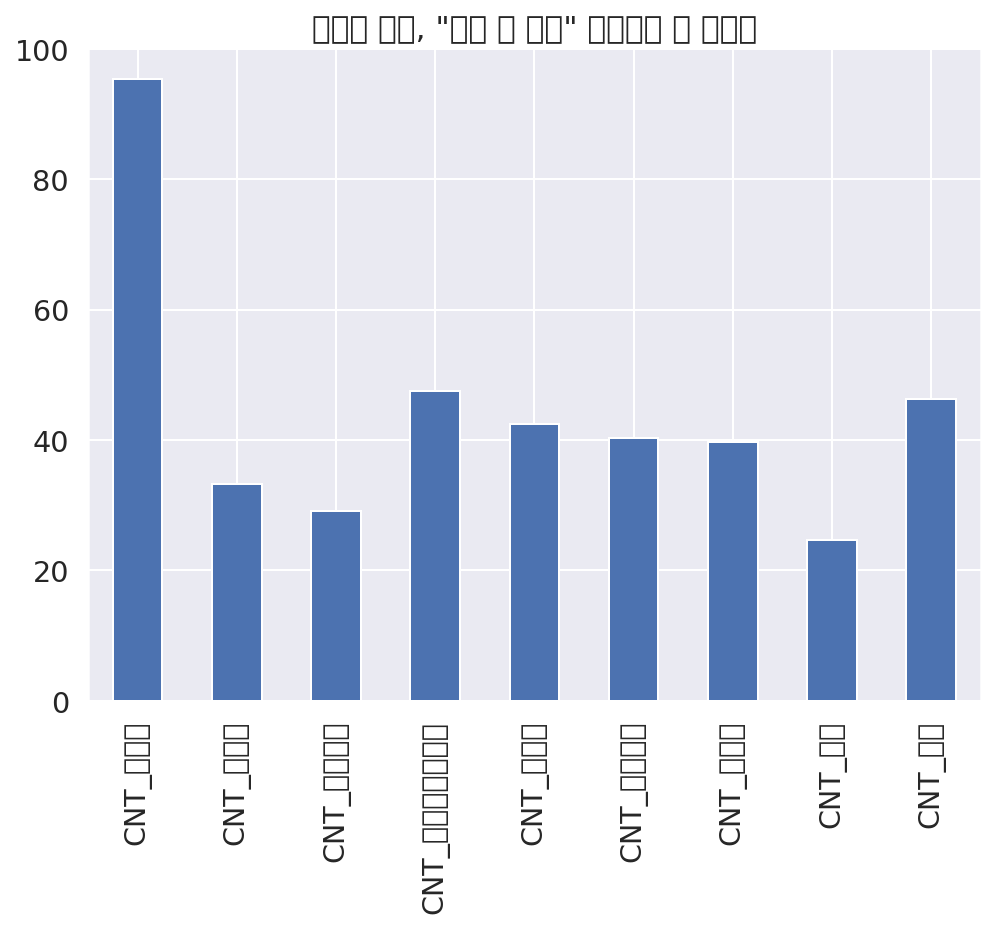

In [97]:
업종감소율.plot(kind='bar', figsize=(8,6))
plt.title('코로나 전후, "패션 및 뷰티" 세부업종 별 감소율')
plt.show()

In [98]:
# 소비(내부) 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = detail_no_covid[['CNT_온라인쇼핑', 'CNT_배달앱']].sum()
업종2 = detail_covid[['CNT_온라인쇼핑', 'CNT_배달앱']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 배달앱 사용이 많이 증가했음!!

CNT_온라인쇼핑   -22.075728
CNT_배달앱     -98.592496
dtype: float64

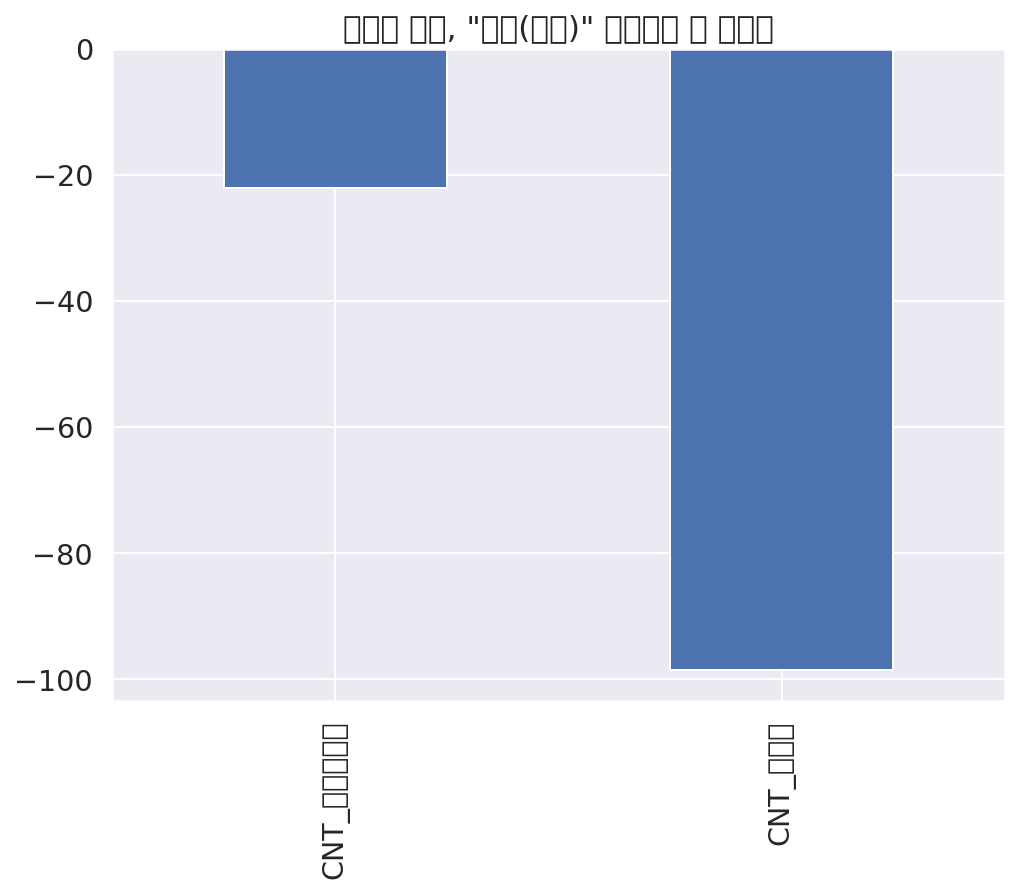

In [99]:
업종감소율.plot(kind='bar', figsize=(8,6))
plt.title('코로나 전후, "소비(내부)" 세부업종 별 감소율')
plt.show()

#### 4) 코로나 전후 지역 별 거래건수 비교. 코로나 추이와 함께 보자

In [100]:
지역1 = no_covid[['고객거주시', 'CNT']].groupby(['고객거주시']).sum().sort_values(by=['고객거주시']).T
지역2 = covid[['고객거주시', 'CNT']].groupby(['고객거주시']).sum().sort_values(by=['고객거주시']).T

# 감소율 파악. 파악 후, 감소율이 큰 지역에서 1-2월에 코로나 확진자 수가 많았는지 확인(세종, 대전, 서울)
지역감소율 = ((지역1 - 지역2) / 지역1) * 100
지역감소율

고객거주시,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
CNT,11.273166,16.64237,13.044576,11.973425,10.699782,13.811901,17.909904,14.475121,17.179222,22.676237,15.598907,23.214733,8.247488,12.993031,4.733615,12.715423,9.808017


## 코로나 단기, 장기 비교 진행

In [101]:
# 비교를 위한 데이터 생성

# 2020.02 - 2020.05
data1 = data[(data['year'] == '2020') & (data['month'] == '02')]
data2 = data[(data['year'] == '2020') & (data['month'] == '03')]
data3 = data[(data['year'] == '2020') & (data['month'] == '04')]
data4 = data[(data['year'] == '2020') & (data['month'] == '05')]

# 2021.02 - 2021.05
data5 = data[(data['year'] == '2021') & (data['month'] == '02')]
data6 = data[(data['year'] == '2021') & (data['month'] == '03')]
data7 = data[(data['year'] == '2021') & (data['month'] == '04')]
data8 = data[(data['year'] == '2021') & (data['month'] == '05')]

# 각각 데이터 합치기
spring_20 = pd.concat([data1, data2, data3, data4])
spring_21 = pd.concat([data5, data6, data7, data8])

In [102]:
# len(no_covid) + len(covid) + len(spring_20) + len(spring_21)

#### 1) 코로나 단기, 장기 전체 거래수 비교

In [103]:
# 전체 건수 비교
print(spring_20['CNT'].sum())
print(spring_21['CNT'].sum())

# 감소율 파악
print(round((spring_20['CNT'].sum() - spring_21['CNT'].sum()) / spring_20['CNT'].sum() * 100, 2))

# 21.02-05 기간에 전체 건수가 10퍼센트 정도 증가했음 -> 왜 증가했는지 파악(긴급재난지원금 등 파악)
# 소상공인 4차 재난지원금 3월29일부터 지급, 아래 사진 참고 -> 21년도 3~5월 간 지원금 지급이 있었음


# 거리두기 확인(20년도)
# 20년도 4월8일~19일 서울 유흥업소 첫 집합금지명령, 이전에도 감염 위험이 높은 시설의 운영 자제를 강력 권고하는 수준
# 20.05.06. ~ 20.06.27. 생활 속 거리두기 시행

172973004
190687309
-10.24


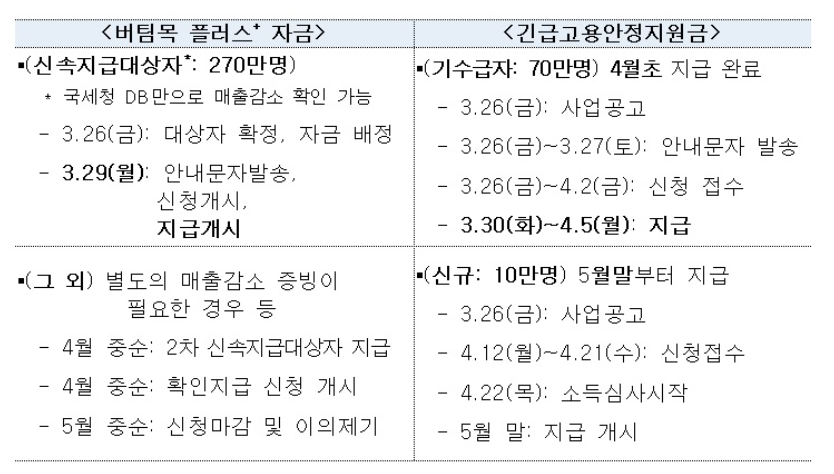

#### 2) 코로나 단기, 장기 업종 별 거래수 비교

In [104]:
업종1 = spring_20[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].sum()
업종2 = spring_21[['여가생활', '소비(외부)', '소비(내부)', '패션 및 뷰티', '건강', '식품', '교육', '교통', '기타']].sum()

# 업종 별 감소율
업종감소율 = (업종1 - 업종2) / 업종1 * 100
업종감소율.sort_values(ascending=False)

# 감소한 업종은 소폭 감소한 반면, 소비(내부), 교육, 패션 및 뷰티 증가

여가생활        8.699551
교통          4.627529
건강          2.896170
식품         -4.226742
소비(외부)     -9.205280
패션 및 뷰티   -13.821737
기타        -15.859046
교육        -22.808129
소비(내부)    -34.120588
dtype: float64

### 3) 증가한 업종 자세히 살펴보기



In [105]:
# 2020.02 - 2020.05
data1 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '02')]
data2 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '03')]
data3 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '04')]
data4 = detail_data[(detail_data['year'] == '2020') & (detail_data['month'] == '05')]

# 2021.02 - 2021.05
data5 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '02')]
data6 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '03')]
data7 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '04')]
data8 = detail_data[(detail_data['year'] == '2021') & (detail_data['month'] == '05')]


# 코로나 전후 각각 데이터 합치기
spring_20 = pd.concat([data1, data2, data3, data4])
spring_21 = pd.concat([data5, data6, data7, data8])

In [106]:
spring_20.head(1)

,연령성별,직업,추정소득,일인가구여부,고객수,CNT,CNT_DAY_월,CNT_DAY_화,CNT_DAY_수,CNT_DAY_목,CNT_DAY_금,CNT_DAY_토,CNT_DAY_일,CNT_DAY_평일,CNT_DAY_주말공휴일,CNT_TIME_A,CNT_TIME_B,CNT_TIME_C,CNT_TIME_D,CNT_TIME_E,CNT_TIME_F,CNT_TIME_G,CNT_TIME_H,CNT_TIME_I,CNT_TIME_J,CNT_가례,CNT_가전,CNT_건강보조,CNT_골프장,CNT_공과금,CNT_관람,CNT_교육기타,CNT_교통,CNT_놀이공원,CNT_대중교통,CNT_동물병원,CNT_마트할인점,CNT_면세점,CNT_문구사무용품,CNT_배달앱,CNT_백화점,CNT_병원,CNT_보험,CNT_뷰티,CNT_상품권,CNT_서적,CNT_쇼핑기타,CNT_숙박,CNT_스포츠시설,CNT_스포츠의류용품,CNT_아울렛,CNT_여행상품,CNT_온라인쇼핑,CNT_유아교육,CNT_유흥,CNT_음식점,CNT_의류,CNT_인테리어,CNT_정기결제,CNT_제과점,CNT_주류판매점,CNT_주생활관리,CNT_주유,CNT_주차,CNT_차량관리,CNT_차량구매,CNT_취미,CNT_커피음료,CNT_패션잡화,CNT_편의점,CNT_학교,CNT_학원,CNT_화장품,month,year,고객거주시
41067,C,J.기타,B,X,788,2500,399,410,318,372,335,407,259,1834,666,394,23,92,372,407,376,356,302,127,51,0,38,142,0,27,0,0,17,0,189,10,609,0,0,0,11,148,123,0,0,0,0,0,0,0,16,0,136,0,0,419,0,37,116,46,0,12,108,12,11,0,28,34,0,151,0,0,0,02,2020,경기


In [107]:
# 소비(내부) 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = spring_20[['CNT_온라인쇼핑', 'CNT_배달앱']].sum()
업종2 = spring_21[['CNT_온라인쇼핑', 'CNT_배달앱']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 1년동안 배달앱 사용이 많이 증가했음!!

CNT_온라인쇼핑    -24.920051
CNT_배달앱     -108.632311
dtype: float64

In [108]:
# 교육 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = spring_20[['CNT_교육기타', 'CNT_학교', 'CNT_학원', 'CNT_유아교육']].sum()
업종2 = spring_21[['CNT_교육기타', 'CNT_학교', 'CNT_학원', 'CNT_유아교육']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 유아교육, 학원 많이 증가했음. 코로나 장기화에 따라서 유치원도 정상운영

CNT_학교       21.384529
CNT_교육기타     -9.687666
CNT_학원      -28.446701
CNT_유아교육   -395.710456
dtype: float64

In [109]:
# 패션 및 뷰티 세부 컬럼만 추출
# 어떤 세부업종이 크게 변화했는지 확인
업종1 = spring_20[['CNT_면세점', 'CNT_백화점', 'CNT_쇼핑기타', 'CNT_스포츠의류용품', 'CNT_아울렛',  'CNT_패션잡화',  'CNT_화장품',  'CNT_뷰티',  'CNT_의류']].sum()
업종2 = spring_21[['CNT_면세점', 'CNT_백화점', 'CNT_쇼핑기타', 'CNT_스포츠의류용품', 'CNT_아울렛',  'CNT_패션잡화',  'CNT_화장품',  'CNT_뷰티',  'CNT_의류']].sum()

# 감소율 파악
업종감소율 = ((업종1 - 업종2) / 업종1) * 100
업종감소율.sort_values(ascending=False)

# 아울렛, 면세점, 백화점 증가 : 21년도 2~5월에 해외여행 관련 방역규제 찾아보기 -> 해외여행 규제 완화는 6-7월부터.. 그럼 제주도?!

CNT_화장품         4.687308
CNT_스포츠의류용품     3.738805
CNT_의류         -0.448505
CNT_쇼핑기타       -4.169270
CNT_뷰티        -10.093258
CNT_패션잡화      -10.120742
CNT_백화점       -24.419204
CNT_면세점       -25.577028
CNT_아울렛       -25.635185
dtype: float64

## 4. 이후 진행 방향
1) 추가 시도
  - 시간대 별 사용건수 분석<br>
  - 남성, 여성 비교(연령성별 ABC vs DEF)<br>
  - 지역 별 거래건수(코로나 변화와 함께 보기)<br>
  - 직업별, 소득별, 등 1인당 거래건수 파악하기★<br>

2) 사용할 코드만 취합 후 시각화 진행★<br>

